# Aufbereitung von Hektarrasterdaten (erste Tests)
Datum: 16.11.2021

Mit Colab kann **dieses Jupyter-Notebook interaktiv im Browser** gestartet werden:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DonGoginho/myPy/blob/main/quartierspiegel/quartierspiegel_geodaten_aufbereiten.ipynb)

## Hektarraster mit Statistischen Daten verknüpfen

Bis heute gibt es noch kein automatisierter Prozess um die Statistischen Daten mit den Hektarrastern zu verknüpfen.
Grundsätzlich brauchen wir **Punktdaten**, welche wir mit den Geometrien der Hektarraster per Spatial Join verknüpfen und dann aggregieren.

Die Shapefiles der Hektarraster sind abgelegt unter:

 - **Stadtraster im O:GIS > Daten**: \\szh\ssz\data\GIS\Daten\Vektor\_aktuell\bfs_stadtraster100m_lv95.shp
 - **Vollraster im O:GIS > Daten**:\\szh\ssz\data\GIS\Daten\Vektor\_aktuell\bfs_vollraster100m_lv95.shp


<!---  
Dieses Notebook verwendet als Vorlage die Webseite «[Kitas in Berlin - Jupyter Notebook](https://juanitorduz.github.io/kitas_berlin/)» 
---!>

## Importiere notwendige Packages:

In [381]:
#pip install geopandas altair fiona requests folium mplleaflet contextily seaborn datetime

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import altair as alt
import fiona
import requests
import mplleaflet
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from datetime import datetime


## Datenaufbereitung

### Globale Variabeln

Als Zeitvariable berechnen wir erst mal das heutige Datum. Wir können diese Werte als Dateinamen verwenden.

**Steuerungsvariable activate_date**: 
- False: in den Filenamen kommen beim Export KEINE Datenangaben mit
- True: die Exportfiles haben *FILENAMEN_DATUM* im Namen

In [2]:
activate_date = False;


#https://www.programiz.com/python-programming/datetime/strftime
now = datetime.now() # current date and time
year_today = now.strftime("%Y")

if activate_date == True:
    date_today = "_"+now.strftime("%Y-%m-%d")
    #store_o_gis = False
    
else:
    date_today =""
    #store_o_gis = True


In [3]:
print("Datum: "+date_today +" Jahr: "+year_today)

Datum:  Jahr: 2021


### Pfade


In [4]:
gis_output_ablagepfad = "//szh/ssz/data/GIS/Sandbox/2021/ha_ra/wbev2020/geoDat/output_jupyter/"
#+year_today+"/quartierspiegel/"
print(gis_output_ablagepfad )

#"//szh/ssz/data/GIS/Sandbox/2021/ha_ra/wbev2020/geoDat/wohnbev2020_hektarraster.gpkg


//szh/ssz/data/GIS/Sandbox/2021/ha_ra/wbev2020/geoDat/output_jupyter/


### Basis Geodaten

Importiere Basis-Geodaten:
- **Statistischen Quartiere**
- **Stadtgrenze** (aus der SSZ-Geodatenablage)
- **Hektarraster** (aus der SSZ-Geodatenablage)



In [386]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
url0 = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
gdf_adm_statistische_quartiere_map = gpd.read_file(url0)
print('done')

done


Stadtgrenze

In [387]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
pfad_grenze = r"\\szh\ssz\data\GIS\Daten\Vektor\_aktuell\adm_stadtgrenze_a.shp"
gdf_adm_stadtgrenze_lv95 = gpd.read_file(pfad_grenze)

gdf_adm_stadtgrenze_wgs84_all =gdf_adm_stadtgrenze_lv95.to_crs(epsg=4326)

print('done')

done


Test Verwaltungsquartiere, resp. ehemals **historische Quartiere**

In [13]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
pfad_histQuartiere = r"https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Quartiere__basierend_auf_Vermessungsbezirken_?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_verwaltungsquartiere_a"
gdf_adm_verwaltungsquartiere_a = gpd.read_file(pfad_grenze)

gdf_adm_stadtgrenze_wgs84_all =gdf_adm_stadtgrenze_lv95.to_crs(epsg=4326)

print('done')

done


,id,bezeichnung,entstehung,kuerzel,objid,geometry
0,adm_verwaltungsquartiere_a.4,Wiedikon,6,,4,"POLYGON ((8.52820 47.36885, 8.52798 47.36900, ..."
1,adm_verwaltungsquartiere_a.17,Altstetten,6,,17,"POLYGON ((8.47024 47.37395, 8.47034 47.37396, ..."
2,adm_verwaltungsquartiere_a.16,Höngg,6,,16,"POLYGON ((8.50543 47.39495, 8.50552 47.39494, ..."
3,adm_verwaltungsquartiere_a.7,Schwamendingen,6,,7,"POLYGON ((8.58317 47.38831, 8.58315 47.38851, ..."
4,adm_verwaltungsquartiere_a.2,Affoltern,6,,2,"POLYGON ((8.52768 47.43266, 8.52768 47.43266, ..."
5,adm_verwaltungsquartiere_a.5,Wollishofen,6,,5,"POLYGON ((8.52478 47.35368, 8.52474 47.35351, ..."
6,adm_verwaltungsquartiere_a.10,Hottingen,5,,10,"POLYGON ((8.55670 47.36406, 8.55662 47.36416, ..."
7,adm_verwaltungsquartiere_a.11,Witikon,6,,11,"POLYGON ((8.58258 47.35328, 8.58271 47.35331, ..."
8,adm_verwaltungsquartiere_a.14,Riesbach,5,,14,"POLYGON ((8.55670 47.36406, 8.55670 47.36406, ..."
9,adm_verwaltungsquartiere_a.15,Seebach,6,,15,"POLYGON ((8.52768 47.43266, 8.52766 47.43260, ..."


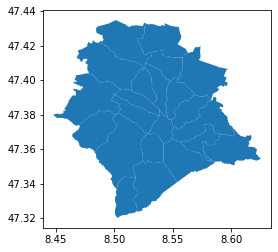

In [12]:
gdf_adm_verwaltungsquartiere_a.plot()
gdf_adm_verwaltungsquartiere_a.head(30)

Hektarraster

In [388]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
pfad_stadtraster = r"\\szh\ssz\data\GIS\Daten\Vektor\_aktuell\bfs_stadtraster100m_lv95.shp"
gdf_bfs_stadtraster100m_lv95 = gpd.read_file(pfad_stadtraster)

gdf_bfs_stadtraster100m_wgs84=gdf_bfs_stadtraster100m_lv95.to_crs(epsg=4326)

print('done')


done


In [389]:
# Rename columns bei Bedarf
rename_cols = {
    'name': 'bfs_name',
}

columns_to_drop = ['objid']

gdf_adm_stadtgrenze_wgs84 = gdf_adm_stadtgrenze_wgs84_all \
    .copy() \
    .drop(columns_to_drop, axis=1) \
    .rename(columns=rename_cols) \
    

In [390]:
#gdf_adm_stadtgrenze_wgs84

<AxesSubplot:>

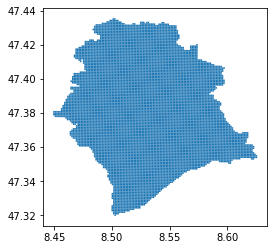

In [391]:
gdf_bfs_stadtraster100m_wgs84.plot()

### Basis Statistikdaten einlesen und georeferenzieren

Csv2geodataframe --> https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

#### 1. csv einlesen

In [392]:
pfad_wbev20_xy_adress = r"//szh/ssz/data/GIS/Sandbox/2021/ha_ra/wbev2020/statDat/wbev2020_xy.csv"

gdf_imp_csv_wbev20_xy_adress_lv95 = gpd.read_file(pfad_wbev20_xy_adress)

gdf_imp_csv_wbev20_xy_adress_lv95.crs = "EPSG:2056"

gdf_imp_csv_wbev20_xy_adress_lv95.head(1)

,Beob.,NKoord,EKoord,AnzBestWir,geometry
0,1,1241979.380,2680647.480,2,None


In [393]:

gdf_imp_csv_wbev20_xy_adress_lv95['AnzBestWir'] = gdf_imp_csv_wbev20_xy_adress_lv95['AnzBestWir'].astype(int)
gdf_imp_csv_wbev20_xy_adress_lv95.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 157742 entries, 0 to 157741
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Beob.       157742 non-null  object  
 1   NKoord      157742 non-null  object  
 2   EKoord      157742 non-null  object  
 3   AnzBestWir  157742 non-null  int32   
 4   geometry    0 non-null       geometry
dtypes: geometry(1), int32(1), object(3)
memory usage: 5.4+ MB


#### 2. csv georeferenzieren und die Koordinatenwerte zu einem Punktdatensatz bilden

In [396]:
gdf_wbev20_xy_adress = gpd.GeoDataFrame(
    gdf_imp_csv_wbev20_xy_adress_lv95, geometry=gpd.points_from_xy(gdf_imp_csv_wbev20_xy_adress_lv95.EKoord, gdf_imp_csv_wbev20_xy_adress_lv95.NKoord))

Setze zuerst dem GeoDataFrame ein CRS bevor die Daten re-projeziert werden können:
(weitere Infos: https://geopandas.org/en/stable/docs/user_guide/projections.html )

In [397]:
gdf_wbev20_xy_adress.crs = "EPSG:2056"
#gdf_wbev20_xy_adress.info()

In [398]:
gdf_wbev20_xy_adress_lv95 = gdf_wbev20_xy_adress.to_crs(epsg=2056)

gdf_wbev20_xy_adress_lv95.head(1)
#test.plot()

,Beob.,NKoord,EKoord,AnzBestWir,geometry
0,1,1241979.380,2680647.480,2,POINT (2680647.480 1241979.380)


<AxesSubplot:>

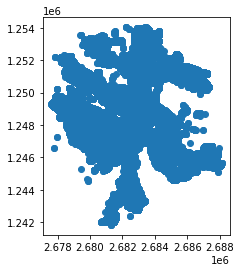

In [399]:
gdf_wbev20_xy_adress_lv95.plot()

### Aggregieren auf Hektarraster: Spatial Join von Hektarraster und Adress-Punkt-Daten

Vorgehen:
1. Ordne den Adresspunkten mit den Bevölkerungswerten die Hektarraster-ID (`gdf_bfs_stadtraster100m_lv95` > `RELI`) mittels spatial Join zu.
2. Aggregiere die Bevölkerungszahlen pro Hektarraster-ID
3. Joine die aggregierten Werte der Punktdaten an die Hektarrasterdaten via RELI.


In [400]:
#gdf_wbev20_xy_adress_lv95.crs
#gdf_bfs_stadtraster100m_lv95.head(1)

**Schritt 1 - Spatial Join**

In [401]:
gdf_wbev20_xy_adress_lv95_reli = gpd.sjoin(gdf_wbev20_xy_adress_lv95, gdf_bfs_stadtraster100m_lv95, how="inner", op='intersects')
gdf_wbev20_xy_adress_lv95_reli.head(5)
#gdf_wbev20_xy_adress_lv95_reli.to_file("Test.gpkg", layer='gdf_wbev20_xy_adress_lv95_reli', driver="GPKG")

,Beob.,NKoord,EKoord,AnzBestWir,geometry,index_right,RELI,ID,X_MIN,X_MAX,Y_MIN,Y_MAX
0,1,1241979.380,2680647.480,2,POINT (2680647.480 1241979.380),9509,68062419,17043,680600.0,680700.0,241900.0,242000.0
153,154,1241979.377,2680647.479,1,POINT (2680647.479 1241979.377),9509,68062419,17043,680600.0,680700.0,241900.0,242000.0
43341,43342,1241979.380,2680647.480,1,POINT (2680647.480 1241979.380),9509,68062419,17043,680600.0,680700.0,241900.0,242000.0
125648,125649,1241979.380,2680647.480,1,POINT (2680647.480 1241979.380),9509,68062419,17043,680600.0,680700.0,241900.0,242000.0
150780,150781,1241979.380,2680647.480,1,POINT (2680647.480 1241979.380),9509,68062419,17043,680600.0,680700.0,241900.0,242000.0


In [402]:
#gdf_wbev20_xy_adress_lv95_reli.dtypes

**Schritt 2 - Aggregiere die Bevölkerungszahlen pro Hektarraster-ID.**
Damit die Summe korrekt berechnet wird, muss der summierte Wert vom Typ Integer oder zumindest numerisch sein.

In [403]:
gdf_wbev20_xy_adress_lv95_reli_agg = gdf_wbev20_xy_adress_lv95_reli \
    .groupby(['RELI']) \
    .agg( sumAnzBestWir=('AnzBestWir', 'sum')) \
    .sort_values('sumAnzBestWir', ascending=False)

In [404]:
gdf_wbev20_xy_adress_lv95_reli_agg.sumAnzBestWir.sum()

434736

**3. Joine die aggregierten Werte der Punktdaten an die Hektarrasterdaten via `RELI`.**



In [1]:
join_aggWBev2HaRa = gdf_bfs_stadtraster100m_lv95.merge(gdf_wbev20_xy_adress_lv95_reli_agg, on=["RELI"]).sort_values('sumAnzBestWir', ascending=False)

join_aggWBev2HaRa.head()

NameError: name 'gdf_bfs_stadtraster100m_lv95' is not defined

Speichere den Datensatz als GeoPackage ab

In [406]:
join_aggWBev2HaRa.to_file(gis_output_ablagepfad+"WBev2HaRa.gpkg", layer='gdf_wbev20_xy_adress_lv95_reli', driver="GPKG")


In [407]:
print(gis_output_ablagepfad+"WBev2HaRa.gpkg")

//szh/ssz/data/GIS/Sandbox/2021/ha_ra/wbev2020/geoDat/output_jupyter/WBev2HaRa.gpkg


### In QGIS aufbereitete Daten prüfen


In [408]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
pfad_wbev20_hara = r"//szh/ssz/data/GIS/Sandbox/2021/ha_ra/wbev2020/geoDat/wohnbev2020_hektarraster.gpkg"

gdf_wbev20_hara_lv95 = gpd.read_file(pfad_wbev20_hara )

gdf_wbev20_hara_wgs84_all =gdf_wbev20_hara_lv95.to_crs(epsg=4326)

print('done')

done


In [409]:
gdf_wbev20_hara_lv95.head()
gdf_wbev20_hara_lv95.dtypes
gdf_wbev20_hara_lv95.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9545 entries, 0 to 9544
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   RELI      9545 non-null   int64   
 1   ID        9545 non-null   int64   
 2   wbev21    9545 non-null   int64   
 3   geometry  9545 non-null   geometry
dtypes: geometry(1), int64(3)
memory usage: 298.4 KB


In [410]:
#mySelection = agg_sel_for_viz[(agg_sel_for_viz.QuarSort < 2) & (agg_sel_for_viz.AnzBestWir <5)]
myTest = gdf_wbev20_hara_lv95 \
    .groupby(['RELI','wbev21']) \
    .agg(sum_AnzBestWir=('wbev21', 'sum')) \
    .query('sum_AnzBestWir != 0') \
    .sort_values('sum_AnzBestWir', ascending=False)

In [411]:
myTest

,,sum_AnzBestWir
RELI,wbev21,
68042512,546,546
67932483,516,516
67922482,514,514
68172437,466,466
68462520,463,463
...,...,...
67982486,1,1
67992466,1,1
68332540,1,1


In [412]:
#test = gdf_wbev20_hara_lv95.groupby(['wbev21'])[['wbev21']].sum()
TotalWB = gdf_wbev20_hara_lv95.wbev21.sum()
print(TotalWB)

434736


### Vergleiche in Python vs QGIS aufbereitete Daten

Gibt es Hektarrasterzellen, die unterschiedliche Werte haben?

In [413]:
jupyterdataVsQgis = join_aggWBev2HaRa.merge(gdf_wbev20_hara_lv95, on=["RELI"]).sort_values('sumAnzBestWir', ascending=False)
jupyterdataVsQgis.head()

,RELI,ID_x,X_MIN,X_MAX,Y_MIN,Y_MAX,geometry_x,sumAnzBestWir,ID_y,wbev21,geometry_y
0,68042512,4393,680400.0,680500.0,251200.0,251300.0,"POLYGON ((2680400.040 1251299.946, 2680500.040...",546,4393,546,"MULTIPOLYGON (((2680400.040 1251299.946, 26805..."
1,67932483,8326,679300.0,679400.0,248300.0,248400.0,"POLYGON ((2679300.040 1248399.946, 2679400.040...",516,8326,516,"MULTIPOLYGON (((2679300.040 1248399.946, 26794..."
2,67922482,8461,679200.0,679300.0,248200.0,248300.0,"POLYGON ((2679200.040 1248299.946, 2679300.040...",514,8461,514,"MULTIPOLYGON (((2679200.040 1248299.946, 26793..."
3,68172437,14606,681700.0,681800.0,243700.0,243800.0,"POLYGON ((2681700.040 1243799.946, 2681800.040...",466,14606,466,"MULTIPOLYGON (((2681700.040 1243799.946, 26818..."
4,68462520,3347,684600.0,684700.0,252000.0,252100.0,"POLYGON ((2684600.040 1252099.946, 2684700.040...",463,3347,463,"MULTIPOLYGON (((2684600.040 1252099.946, 26847..."


In [380]:
diffs = jupyterdataVsQgis[jupyterdataVsQgis.wbev21 !=jupyterdataVsQgis.sumAnzBestWir]

diffs

,RELI,ID_x,X_MIN,X_MAX,Y_MIN,Y_MAX,geometry_x,sumAnzBestWir,ID_y,wbev21,geometry_y


Nein, es gibt keine Unterschiede!